In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df = df.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df['Income_range'] = np.where(df['Taxable_Income']>=30000, 'Good', 'Risky')
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [5]:
df_data = pd.get_dummies(df.iloc[:,:6])
df_data

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [6]:
Fd= df_data.drop(columns={'Taxable_Income'},axis=1)
Fd

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [7]:
Fd1 = pd.concat([df['Income_range'], Fd], axis=1)
Fd1

,Income_range,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [8]:
df= df.drop(columns={'Income_range'},axis=1)
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
df.shape

(600, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [11]:
df.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [12]:
df['Taxable_Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable_Income, dtype: float64

In [13]:
df.isna().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [14]:
df.dtypes

Undergrad          object
Marital_Status     object
Taxable_Income      int64
City_Population     int64
Work_Experience     int64
Urban              object
dtype: object

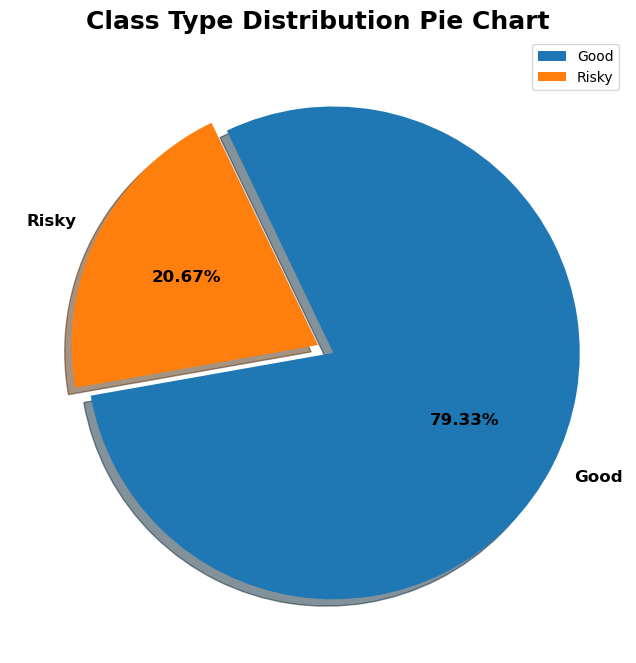

In [15]:
plt.figure(figsize = (12,8))
plt.pie(Fd1['Income_range'].value_counts(),
       labels=Fd1.Income_range.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [16]:
Fd1.Income_range.value_counts()

Good     476
Risky    124
Name: Income_range, dtype: int64

In [17]:
Fd1.isnull().sum()

Income_range               0
City_Population            0
Work_Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

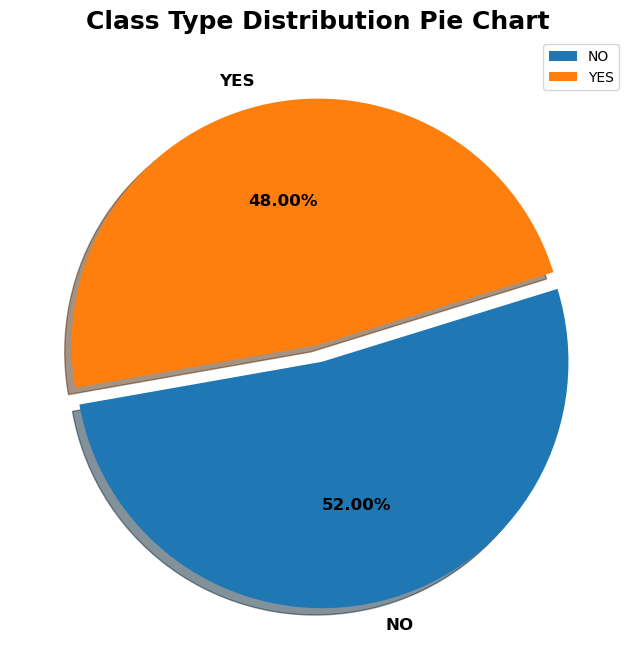

In [18]:
plt.figure(figsize = (12,8))
plt.pie(df['Undergrad'].value_counts(),
       labels=df.Undergrad.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [19]:
df.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

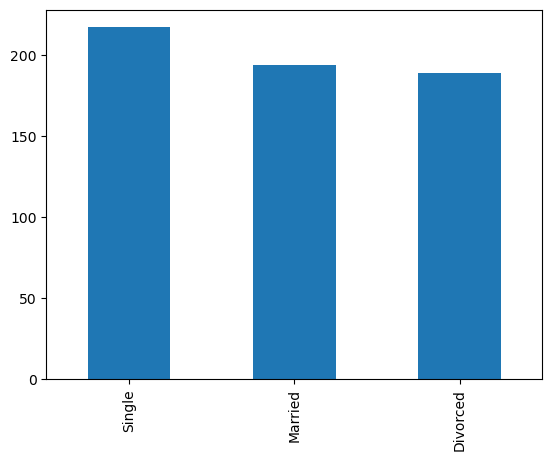

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64


In [20]:
df['Marital_Status'].value_counts(sort=True).plot.bar()
plt.show()
print(df['Marital_Status'].value_counts())

# Model Building



# Building Decision Tree Classifier using Entropy Criteria



# Model 1

In [21]:
x=Fd1.iloc[:,1:]
y=Fd1['Income_range']

In [22]:
x

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [23]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income_range, Length: 600, dtype: object

In [24]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.35,random_state=42)

In [25]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [26]:
Random_forest_results = cross_val_score(Random_forest_model, x_train, y_train, cv=kfold)
print(Random_forest_results.mean())

0.7435897435897436


In [27]:
Random_forest_preds = Random_forest_model.predict(x_test)
pd.crosstab(y_test,Random_forest_preds)

col_0,Good,Risky
Income_range,,
Good,152,12
Risky,45,1


In [28]:
np.mean(Random_forest_preds==y_test)

0.7285714285714285

In [29]:
print('Accuracy Score        :',accuracy_score(y_test,Random_forest_preds))
print('Classification Report :\n',classification_report(y_test,Random_forest_preds))

Accuracy Score        : 0.7285714285714285
Classification Report :
               precision    recall  f1-score   support

        Good       0.77      0.93      0.84       164
       Risky       0.08      0.02      0.03        46

    accuracy                           0.73       210
   macro avg       0.42      0.47      0.44       210
weighted avg       0.62      0.73      0.67       210



# Model 2

In [30]:
x_train1, x_test1,y_train1,y_test1 = train_test_split(x,y, test_size=0.4,random_state=42)

In [31]:
num_trees = 150
max_features = 4
kfold = KFold(n_splits=15)
Random_forest_model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model1.fit(x_train1,y_train1)

RandomForestClassifier(max_features=4, n_estimators=150)

In [32]:
Random_forest_results1 = cross_val_score(Random_forest_model1, x_train1, y_train1, cv=kfold)
print(Random_forest_results1.mean())

0.7527777777777779


In [33]:
Random_forest_preds1 = Random_forest_model1.predict(x_test1)
pd.crosstab(y_test1,Random_forest_preds1)

col_0,Good,Risky
Income_range,,
Good,177,10
Risky,51,2


In [34]:
np.mean(Random_forest_preds1==y_test1)

0.7458333333333333

In [35]:
print('Accuracy Score        :',accuracy_score(y_test1,Random_forest_preds1))
print('Classification Report :\n',classification_report(y_test1,Random_forest_preds1))

Accuracy Score        : 0.7458333333333333
Classification Report :
               precision    recall  f1-score   support

        Good       0.78      0.95      0.85       187
       Risky       0.17      0.04      0.06        53

    accuracy                           0.75       240
   macro avg       0.47      0.49      0.46       240
weighted avg       0.64      0.75      0.68       240



# Model 3

In [36]:
x_train2, x_test2,y_train2,y_test2 = train_test_split(x,y, test_size=0.33,random_state=82)

In [37]:
num_trees = 200
max_features = 5
kfold = KFold(n_splits=20)
Random_forest_model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model2.fit(x_train2,y_train2)

RandomForestClassifier(max_features=5, n_estimators=200)

In [38]:
Random_forest_results2 = cross_val_score(Random_forest_model2, x_train2, y_train2, cv=kfold)
print(Random_forest_results2.mean())

0.7957142857142856


In [39]:
Random_forest_preds2 = Random_forest_model2.predict(x_test2)
pd.crosstab(y_test2,Random_forest_preds2)

col_0,Good,Risky
Income_range,,
Good,145,4
Risky,49,0


In [40]:
np.mean(Random_forest_preds2==y_test2)

0.7323232323232324

In [41]:
print('Accuracy Score        :',accuracy_score(y_test,Random_forest_preds))
print('Classification Report :\n',classification_report(y_test,Random_forest_preds))

Accuracy Score        : 0.7285714285714285
Classification Report :
               precision    recall  f1-score   support

        Good       0.77      0.93      0.84       164
       Risky       0.08      0.02      0.03        46

    accuracy                           0.73       210
   macro avg       0.42      0.47      0.44       210
weighted avg       0.62      0.73      0.67       210



# Check Grid Search CV to get best Parameters

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [5, 10, 15, 20, 30, 50, 75, 100, 125, 150, 175, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 6, 7, 8, 9, 10],
    'max_features': [3, 4, 5, 6]
}

# Initialize GridSearchCV
grid_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid,
                       cv=5)

# Fit the grid search to the data
grid_cv.fit(x_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_cv.best_params_
best_score = grid_cv.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'n_estimators': 10}
Best Score: 0.8025641025641026


# Now, build the model with max_depth 8 , Entropy Criteria , n_estimators - 30, max_features 5


In [43]:
rf_final = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,max_features=5)
rf_final.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=5)

In [44]:
y_pred_final_train = rf_final.predict(x_train)

In [45]:
print('Accuracy Score        :',accuracy_score(y_train,y_pred_final_train))
print('Classification Report :\n',classification_report(y_train,y_pred_final_train))

Accuracy Score        : 0.9564102564102565
Classification Report :
               precision    recall  f1-score   support

        Good       0.95      1.00      0.97       312
       Risky       1.00      0.78      0.88        78

    accuracy                           0.96       390
   macro avg       0.97      0.89      0.93       390
weighted avg       0.96      0.96      0.95       390



# Testing Accuracy


In [46]:
y_pred_final_test = rf_final.predict(x_test)

In [47]:
print('Accuracy Score        :',accuracy_score(y_test,y_pred_final_test))
print('Classification Report :\n',classification_report(y_test,y_pred_final_test))

Accuracy Score        : 0.7714285714285715
Classification Report :
               precision    recall  f1-score   support

        Good       0.78      0.99      0.87       164
       Risky       0.00      0.00      0.00        46

    accuracy                           0.77       210
   macro avg       0.39      0.49      0.44       210
weighted avg       0.61      0.77      0.68       210



In [48]:
feature_importance = pd.DataFrame({ 'Features'  : x_train.columns,'RF_Features': rf_final.feature_importances_})
feature_importance 

,Features,RF_Features
0,City_Population,0.503391
1,Work_Experience,0.307935
2,Undergrad_NO,0.022275
3,Undergrad_YES,0.029222
4,Marital_Status_Divorced,0.023667
5,Marital_Status_Married,0.033575
6,Marital_Status_Single,0.025559
7,Urban_NO,0.024753
8,Urban_YES,0.029623


In [49]:
Rf_feature_imp =feature_importance.sort_values(by= 'RF_Features',axis=0,ascending=False,)
Rf_feature_imp

,Features,RF_Features
0,City_Population,0.503391
1,Work_Experience,0.307935
5,Marital_Status_Married,0.033575
8,Urban_YES,0.029623
3,Undergrad_YES,0.029222
6,Marital_Status_Single,0.025559
7,Urban_NO,0.024753
4,Marital_Status_Divorced,0.023667
2,Undergrad_NO,0.022275


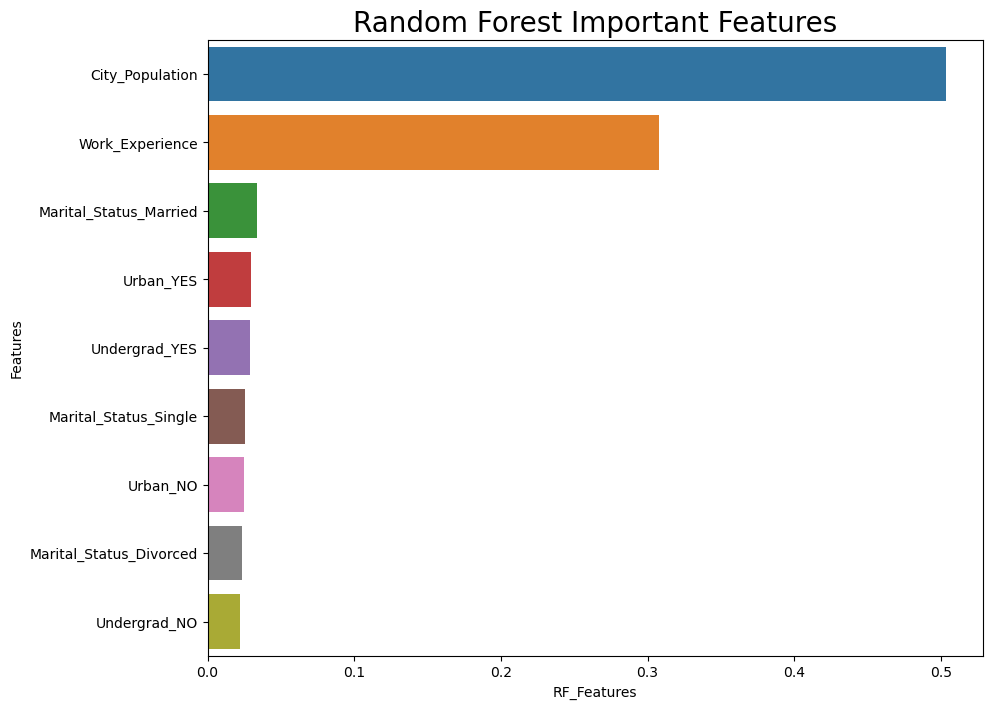

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF_Features',y='Features',data=Rf_feature_imp,)
plt.title('Random Forest Important Features',size = 20)
plt.show()

# End Assignment